In [61]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 2603
print(y_train[image_index])

3


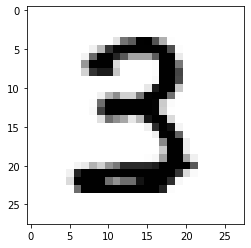

In [8]:
plt.imshow(x_train[image_index], cmap='Greys')

In [9]:
x_train.shape

(60000, 28, 28)

In [62]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [63]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(4,4), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(150, activation=tf.nn.relu))
model.add(Dropout(0.15))
model.add(Dense(10,activation=tf.nn.softmax))

In [69]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.1796 - accuracy: 0.9473
Epoch 2/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.0625 - accuracy: 0.9812
Epoch 3/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0423 - accuracy: 0.9865
Epoch 4/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.0302 - accuracy: 0.9904
Epoch 5/10
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0246 - accuracy: 0.9922
Epoch 6/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.0207 - accuracy: 0.9932
Epoch 7/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.0173 - accuracy: 0.9942
Epoch 8/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0154 - accuracy: 0.9950
Epoch 9/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.0133 - accuracy: 0.9

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.0493 - accuracy: 0.9888


[0.04933782550218816, 0.9888]

9


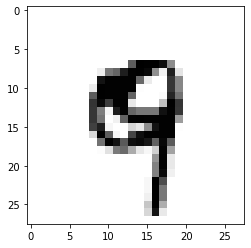

In [14]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [18]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 348us/sample - loss: 0.2032 - accuracy: 0.9389
Epoch 2/10
60000/60000 [==============================] - 20s 334us/sample - loss: 0.0837 - accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0573 - accuracy: 0.9822
Epoch 4/10
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0435 - accuracy: 0.9866
Epoch 5/10
60000/60000 [==============================] - 21s 346us/sample - loss: 0.0365 - accuracy: 0.9878
Epoch 6/10
60000/60000 [==============================] - 21s 343us/sample - loss: 0.0285 - accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 21s 350us/sample - loss: 0.0237 - accuracy: 0.9917
Epoch 8/10
60000/60000 [==============================] - 21s 356us/sample - loss: 0.0225 - accuracy: 0.9923
Epoch 9/10
60000/60000 [==============================] - 22s 361us/sample - loss: 0.0197 - accuracy: 0.9

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 114us/sample - loss: 0.0653 - accuracy: 0.9850


[0.0653046725635384, 0.985]

In [20]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(150, activation=tf.nn.relu))
model.add(Dropout(0.15))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 402us/sample - loss: 0.1922 - accuracy: 0.9437
Epoch 2/10
60000/60000 [==============================] - 24s 392us/sample - loss: 0.0739 - accuracy: 0.9775
Epoch 3/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.0478 - accuracy: 0.9849
Epoch 4/10
60000/60000 [==============================] - 24s 398us/sample - loss: 0.0356 - accuracy: 0.9883
Epoch 5/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0274 - accuracy: 0.9911
Epoch 6/10
60000/60000 [==============================] - 23s 388us/sample - loss: 0.0240 - accuracy: 0.9921
Epoch 7/10
60000/60000 [==============================] - 22s 367us/sample - loss: 0.0179 - accuracy: 0.9940
Epoch 8/10
60000/60000 [==============================] - 24s 398us/sample - loss: 0.0165 - accuracy: 0.9944
Epoch 9/10
60000/60000 [==============================] - 22s 363us/sample - loss: 0.0157 - accuracy: 0.9

In [21]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 187us/sample - loss: 0.0750 - accuracy: 0.9853


[0.0750453478543193, 0.9853]

In [22]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(150, activation=tf.nn.tanh))
model.add(Dropout(0.15))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 508us/sample - loss: 0.1915 - accuracy: 0.9424
Epoch 2/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.0746 - accuracy: 0.9773- loss: 0.0749 - accuracy: 0.97 - ETA: 1s - - ETA: 0s - loss:
Epoch 3/10
60000/60000 [==============================] - 30s 499us/sample - loss: 0.0507 - accuracy: 0.9842
Epoch 4/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.0384 - accuracy: 0.9879
Epoch 5/10
60000/60000 [==============================] - 23s 386us/sample - loss: 0.0290 - accuracy: 0.9909
Epoch 6/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.0215 - accuracy: 0.9930
Epoch 7/10
60000/60000 [==============================] - 24s 395us/sample - loss: 0.0193 - accuracy: 0.9932
Epoch 8/10
60000/60000 [==============================] - 24s 395us/sample - loss: 0.0163 - accuracy: 0.9949
Epoch 9/10
60000/60000 [====================

In [23]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 404us/sample - loss: 0.0541 - accuracy: 0.9847 - los


[0.05405416563136641, 0.9847]

In [24]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.tanh))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 712us/sample - loss: 0.1976 - accuracy: 0.9404- loss: 0.1
Epoch 2/10
60000/60000 [==============================] - 42s 694us/sample - loss: 0.0819 - accuracy: 0.9751
Epoch 3/10
60000/60000 [==============================] - 25s 410us/sample - loss: 0.0579 - accuracy: 0.9821
Epoch 4/10
60000/60000 [==============================] - 21s 352us/sample - loss: 0.0424 - accuracy: 0.9865
Epoch 5/10
60000/60000 [==============================] - 22s 360us/sample - loss: 0.0347 - accuracy: 0.9889
Epoch 6/10
60000/60000 [==============================] - 22s 370us/sample - loss: 0.0283 - accuracy: 0.9907
Epoch 7/10
60000/60000 [==============================] - 21s 342us/sample - loss: 0.0237 - accuracy: 0.9926
Epoch 8/10
60000/60000 [==============================] - 21s 346us/sample - loss: 0.0228 - accuracy: 0.9922
Epoch 9/10
60000/60000 [==============================] - 21s 356us/sample - loss: 0.0198 - ac

In [25]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 177us/sample - loss: 0.0600 - accuracy: 0.9846


[0.06001423866052064, 0.9846]

In [26]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(4,4), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(150, activation=tf.nn.tanh))
model.add(Dropout(0.15))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.1520 - accuracy: 0.9542
Epoch 2/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.0607 - accuracy: 0.9820
Epoch 3/10
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0423 - accuracy: 0.9862- los
Epoch 4/10
60000/60000 [==============================] - 23s 390us/sample - loss: 0.0329 - accuracy: 0.9896- loss:
Epoch 5/10
60000/60000 [==============================] - 21s 351us/sample - loss: 0.0250 - accuracy: 0.9926
Epoch 6/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0195 - accuracy: 0.9939
Epoch 7/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0164 - accuracy: 0.9948
Epoch 8/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0141 - accuracy: 0.9952
Epoch 9/10
60000/60000 [==============================] - 16s 260us/sample - loss: 0.0119 - a

In [27]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 123us/sample - loss: 0.0440 - accuracy: 0.9877


[0.04399394721869648, 0.9877]

In [40]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

Using TensorFlow backend.


In [41]:
from sklearn.model_selection import train_test_split

In [44]:
from tensorflow.keras.utils import to_categorical

In [75]:
def data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    input_shape = (28, 28, 1)
    return x_train, y_train, x_test, y_test, input_shape

In [76]:
def model(x_train, y_train, x_test, y_test, input_shape):
    model = Sequential()
    model.add(Conv2D(28, kernel_size={{choice([(3,3), (5,5), (1,1)])}}, padding={{choice(['valid', 'same'])}}, input_shape=input_shape))
    model.add(MaxPooling2D(pool_size={{choice([(3,3), (2,2)])}}))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense({{choice([128, 256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid', 'tanh'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    if {{choice(['one', 'two'])}} == 'two':
        model.add(Dense({{choice([64, 128, 256, 512])}}))
        model.add(Activation({{choice(['relu', 'sigmoid', 'tanh'])}}))
        model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(10,activation=tf.nn.softmax))
    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    elif choiceval == 'rmsprop':
        optim = RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    else:
        optim = SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
    model.compile(optimizer=optim, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    model.fit(x=x_train,y=y_train, epochs=10, validation_data=(x_test, y_test))
    score, acc = model.evaluate(x_test, y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [ ]:
best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=100,
                                      trials=Trials(),notebook_name='1')

In [85]:
x_train, y_train, x_test, y_test, input_shape = data()
print("Best performing model chosen hyper-parameters:")
print(best_run)
print("Evalutation of best performing model:")
print(best_model.evaluate(x_test, y_test))

Best performing model chosen hyper-parameters:
{'Activation': 2, 'Activation_1': 0, 'Dense': 0, 'Dense_1': 0, 'Dropout': 0.32445680895915574, 'Dropout_1': 1, 'Dropout_2': 0.1540676602242441, 'choiceval': 0, 'kernel_size': 0, 'lr': 0, 'lr_1': 1, 'lr_2': 2, 'padding': 1, 'pool_size': 0}
Evalutation of best performing model:
10000/10000 [==============================] - 1s 134us/sample - loss: 0.0447 - accuracy: 0.9883
[0.04474290358855797, 0.9883]


In [115]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.154067660224244))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.154067660224244))
model.add(Dense(10,activation=tf.nn.softmax))
optim = Adam(lr=10**-3)
model.compile(optimizer=optim, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 360us/sample - loss: 0.2195 - accuracy: 0.9337 - val_loss: 0.0670 - val_accuracy: 0.9790
Epoch 2/10
60000/60000 [==============================] - 22s 360us/sample - loss: 0.0822 - accuracy: 0.9746 - val_loss: 0.0538 - val_accuracy: 0.9833
Epoch 3/10
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0533 - val_accuracy: 0.9824
Epoch 4/10
60000/60000 [==============================] - 22s 363us/sample - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0429 - val_accuracy: 0.9860
Epoch 5/10
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0466 - val_accuracy: 0.9866
Epoch 6/10
60000/60000 [==============================] - 21s 357us/sample - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0513 - val_accuracy: 0.9875
Epoch 7/10
60000/60000 [====================

In [116]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 148us/sample - loss: 0.0503 - accuracy: 0.9877


[0.050322839014456985, 0.9877]